# V01 - Lebensdauer kosmischer Myonen

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})


import pandas as pd
import numpy as np
from uncertainties import ufloat

from scipy.optimize import curve_fit
from scipy.stats import sem

In [2]:
df = pd.read_csv('data/lifetime.csv')
df

,counts
0,0
1,0
2,0
3,0
4,113
...,...
507,0
508,0
509,0
510,0


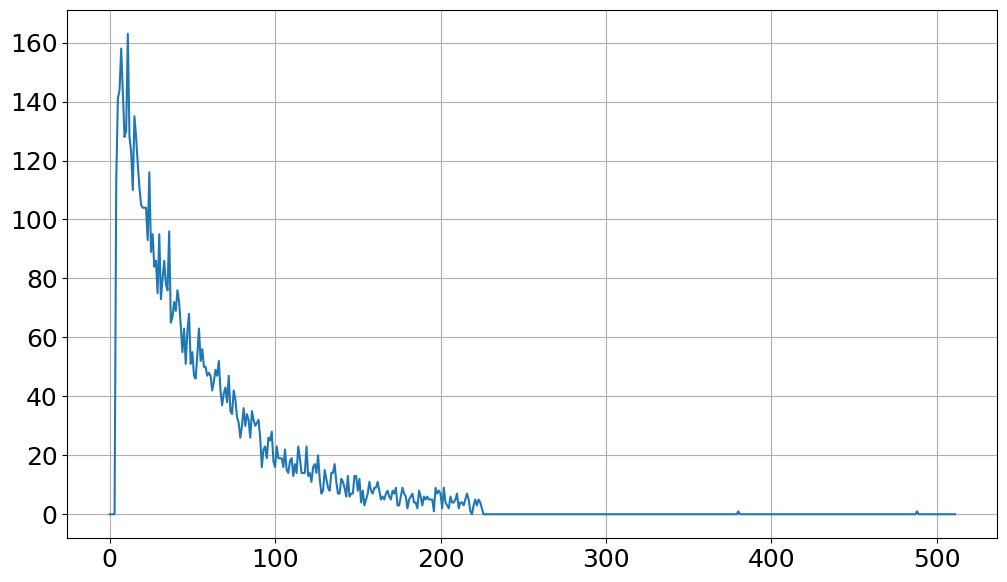

In [3]:
plt.figure(figsize=(12,7), dpi=100)

plt.plot(df['counts'])
plt.grid()

## Verzögerungsleitung

In [4]:
# read in data
df_verz_rechts = pd.read_csv('data/verzoegerung_rechts.csv')

df_verz_links = pd.read_csv('data/verzoegerung_links.csv')
df_verz_links['time'] = df_verz_links['time']*(-1) #define left delay as negative time

# merge left and right delay
df_verz = df_verz_links.merge(df_verz_rechts, how='outer')

# use counts per secon
df_verz['err'] = np.sqrt(df_verz['counts'])/10
df_verz['counts'] = df_verz['counts']/10 #10 seconds measure time
df_verz.sort_values(by=['time'], inplace=True)
df_verz.reset_index(inplace=True)

df_verz

,index,time,counts,err
0,15,-28,0.0,0.000000
1,14,-26,0.0,0.000000
2,13,-24,0.0,0.000000
3,12,-22,0.0,0.000000
4,11,-20,0.1,0.100000
5,10,-18,0.9,0.300000
6,9,-16,1.0,0.316228
7,8,-14,2.3,0.479583
8,7,-12,3.5,0.591608
9,6,-10,5.7,0.754983


- Unsicherheiten: $\sqrt{N}$ Poissonfehler

In [5]:
# define left/right crise and the plateau area
ind_left_i = 7
ind_left_f = 15

ind_right_i = 24
ind_right_f = 30

ind_plateau_i = ind_left_f
ind_plateau_f = ind_right_i

In [6]:
# linear function N(t)
def f(x, a, b):
    return a*x + b

# inverse t(N)
def t_inv(N, a, b):
    return (N-b)/a

In [7]:
# linear fit left
param_L, cov_L = curve_fit(f, df_verz['time'][ind_left_i:ind_left_f], df_verz['counts'][ind_left_i:ind_left_f], sigma=df_verz['err'][ind_left_i:ind_left_f])

lin_L = np.linspace(df_verz['time'][ind_left_i], df_verz['time'][ind_left_f-1]) #linspace to plot the fit

print('Left linear fit:')
print(f'a = {param_L[0]:.2f}+-{np.sqrt(cov_L[0,0]):.2f}')
print(f'b = {param_L[1]:.2f}+-{np.sqrt(cov_L[1,1]):.2f}')

Left linear fit:
a = 1.57+-0.14
b = 23.31+-1.59


In [8]:
# linear fit right
param_R, cov_R = curve_fit(f, df_verz['time'][ind_right_i:ind_right_f], df_verz['counts'][ind_right_i:ind_right_f], sigma=df_verz['err'][ind_right_i:ind_right_f])

lin_R = np.linspace(df_verz['time'][ind_right_i], df_verz['time'][ind_right_f-1]) #linspace to plot the fit

print('Right linear fit:')
print(f'a = {param_R[0]:.2f}+-{np.sqrt(cov_R[0,0]):.2f}')
print(f'b = {param_R[1]:.2f}+-{np.sqrt(cov_R[1,1]):.2f}')

Right linear fit:
a = -1.70+-0.24
b = 39.25+-4.80


In [9]:
# fit plateau
N_plateau = df_verz['counts'][ind_plateau_i:ind_plateau_f].mean()
N_err_plateau = sem(df_verz['counts'][ind_plateau_i:ind_plateau_f])
print(f'Höhe des Plateaus: N_Plateau = {N_plateau:.2f}+-{N_err_plateau:.2f}')

Höhe des Plateaus: N_Plateau = 24.53+-1.03


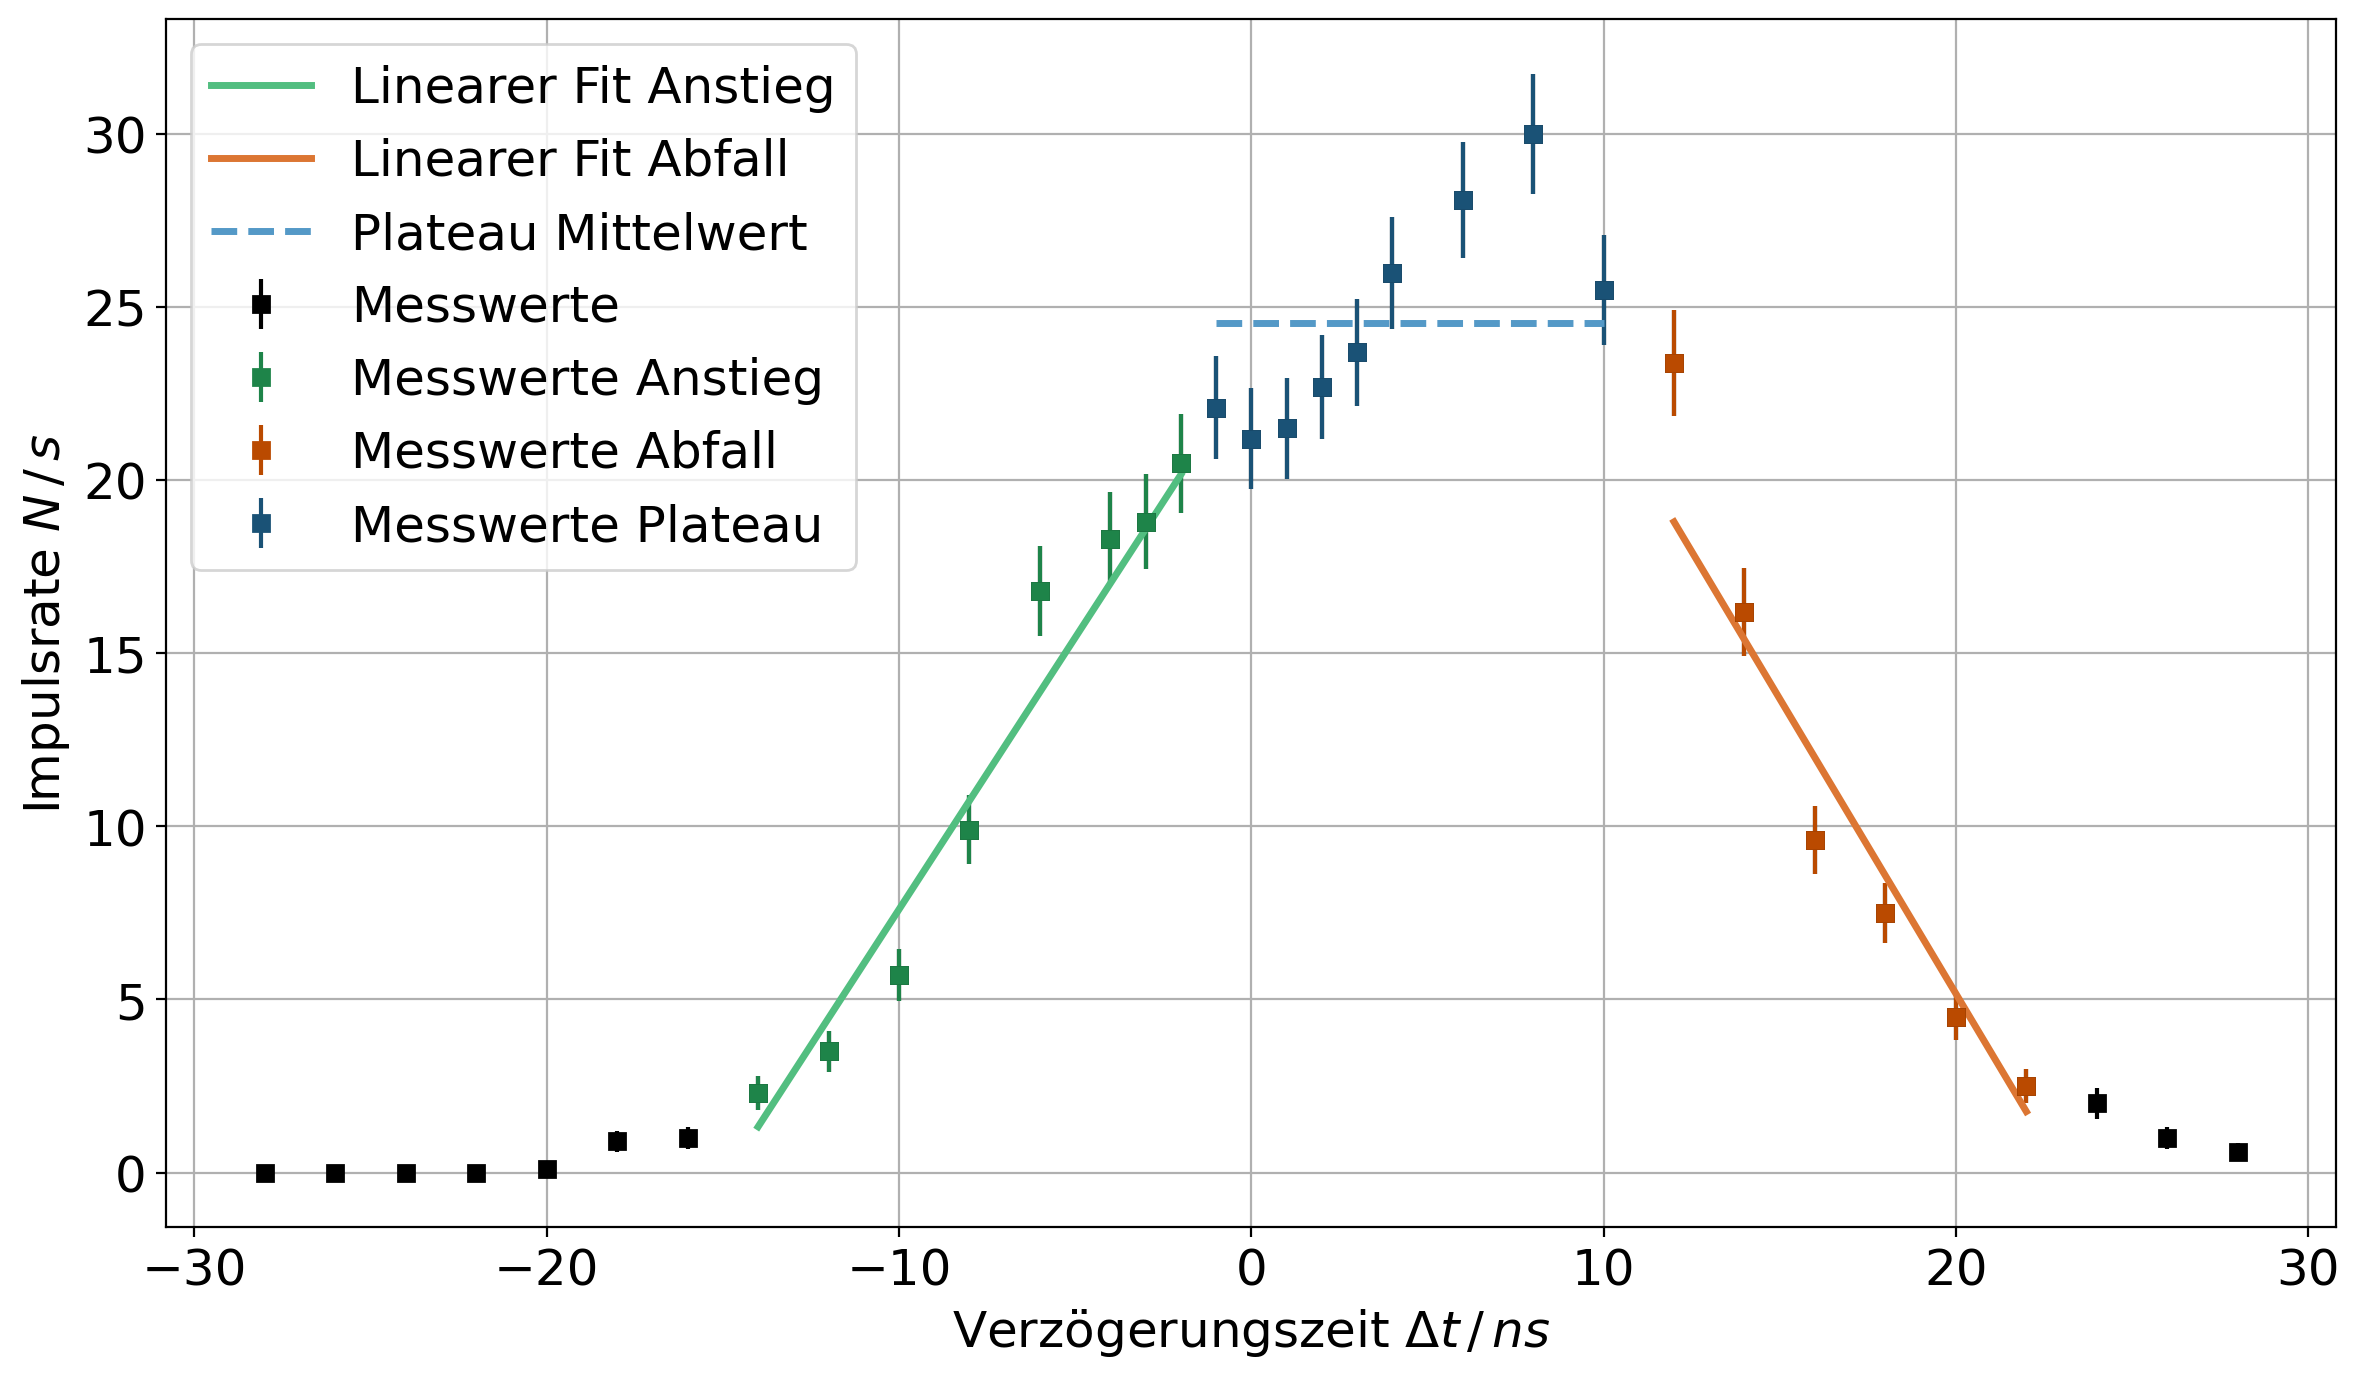

In [10]:
plt.figure(figsize=(14,8), dpi=200)

# unused measurements
plt.errorbar(df_verz['time'], df_verz['counts'], yerr=df_verz['err'].to_numpy(), marker='s', color='k', linestyle='', label='Messwerte')

# left
plt.errorbar(df_verz['time'][ind_left_i:ind_left_f], df_verz['counts'][ind_left_i:ind_left_f], yerr=df_verz['err'][ind_left_i:ind_left_f].to_numpy(), marker='s', color='#1e8449', linestyle='', label='Messwerte Anstieg')
plt.plot(lin_L, f(lin_L, *param_L), color='#52be80', linewidth=2.5, label='Linearer Fit Anstieg')

# right
plt.errorbar(df_verz['time'][ind_right_i:ind_right_f], df_verz['counts'][ind_right_i:ind_right_f], yerr=df_verz['err'][ind_right_i:ind_right_f].to_numpy(), marker='s', color='#ba4a00', linestyle='', label='Messwerte Abfall')
plt.plot(lin_R, f(lin_R, *param_R), color='#dc7633', linewidth=2.5, label='Linearer Fit Abfall')

# plateau
plt.errorbar(df_verz['time'][ind_plateau_i:ind_plateau_f], df_verz['counts'][ind_plateau_i:ind_plateau_f], yerr=df_verz['err'][ind_plateau_i:ind_plateau_f].to_numpy(), marker='s', color='#1a5276', linestyle='', label='Messwerte Plateau') 
plt.hlines(N_plateau, xmin=df_verz['time'][ind_plateau_i], xmax=df_verz['time'][ind_plateau_f-1], linestyle='--', linewidth=2.5, color='#5499c7', label='Plateau Mittelwert')

# Design
plt.xlabel(r'Verzögerungszeit $\Delta t \,/\, ns$')
plt.ylabel(r'Impulsrate $N \,/\, s$')
plt.grid()
plt.legend()
plt.savefig('../content/plots/verzoegerungszeit.pdf')
plt.show()

In [11]:
# define ufloat to calaculate the uncertainties

N_plateau_unc = ufloat(N_plateau, N_err_plateau)

a_L_unc = ufloat(param_L[0], np.sqrt(cov_L[0,0]))
b_L_unc = ufloat(param_L[1], np.sqrt(cov_L[1,1]))


a_R_unc = ufloat(param_R[0], np.sqrt(cov_R[0,0]))
b_R_unc = ufloat(param_R[1], np.sqrt(cov_R[1,1]))

N_plateau_unc, a_L_unc, b_L_unc, a_R_unc, b_R_unc

(24.53333333333333+/-1.0272671404156652,
 1.5702167987239422+/-0.14115646048981978,
 23.306536170499758+/-1.5907413093364777,
 -1.7037943900208323+/-0.24468834259125452,
 39.24631031463266+/-4.797228875145654)

In [12]:
# half-width of the plateau
t_left_unc = t_inv(N_plateau_unc/2, a_L_unc, b_L_unc)
t_right_unc = t_inv(N_plateau_unc/2, a_R_unc, b_R_unc)

print(f't_links = {t_left_unc:.2f}')
print(f't_rechts = {t_right_unc:.2f}')
print(f't_halbwertsbreite = {t_right_unc-t_left_unc:.2f}')

t_links = -7.03+/-1.24
t_rechts = 15.84+/-3.63
t_halbwertsbreite = 22.87+/-3.86
